<a href="https://colab.research.google.com/github/Yuto-T-440/25s-MatDataSci-Tohoku/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

# file path
file_path = '/content/drive/MyDrive/InformationTechnologyFundamental/DFT_all.npz'

# load
data = np.load(file_path, allow_pickle=True)


print(data.files)

['compounds', 'atoms', 'freqs', 'vibmodes', 'zpves', 'U0', 'U298', 'H', 'S', 'G', 'Cv', 'Cp', 'coordinates', 'Vesp', 'Qmulliken', 'dipole', 'quadrupole', 'octupole', 'hexadecapole', 'rots', 'gap', 'Eee', 'Exc', 'Edisp', 'Etot', 'Eatomization']


In [3]:
!pip install torch torchvision torchaudio
!pip install torch-geometric
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [4]:
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool

In [5]:
# load to DFT_all.npz
data = np.load('/content/drive/MyDrive/InformationTechnologyFundamental/DFT_all.npz',allow_pickle=True)

In [6]:
# choose float type variables and transform DataFrame
float_data = {}
for key in data.files:
    array = data[key]
    if np.issubdtype(array.dtype, np.floating):
        if array.ndim == 1:
            float_data[key] = array
        elif array.ndim == 2 and array.shape[1] == 1:
            float_data[key] = array.flatten()

# generate DataFrame
df = pd.DataFrame(float_data)
df

,zpves,U0,U298,H,S,G,Cv,Cp,gap,Eee,Exc,Edisp,Etot,Eatomization
0,0.015336,-399.373920,-399.371071,-399.370127,0.078365,-399.393491,6.166,8.153,0.463952,183.848975,-19.427148,-0.000250,-399.389256,-0.284607
1,0.006165,-2574.652632,-2574.650272,-2574.649328,0.075563,-2574.671857,4.969,6.956,0.475748,1090.367120,-70.138299,-0.000018,-2574.658797,-0.144988
2,0.006857,-460.798691,-460.796330,-460.795386,0.071095,-460.816583,4.968,6.955,0.522899,203.344497,-21.188737,-0.000011,-460.805548,-0.164667
3,0.031175,-291.837641,-291.834571,-291.833627,0.085850,-291.859223,8.246,10.233,0.567573,148.485076,-16.170319,-0.007043,-291.868816,-0.505883
4,0.021592,-76.379035,-76.376200,-76.375256,0.071891,-76.396691,6.003,7.990,0.538935,44.065160,-6.504129,-0.000033,-76.400627,-0.350599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784870,0.017593,-1493.976011,-1493.969233,-1493.968289,0.136245,-1494.008910,20.564,22.552,0.322933,1008.743372,-74.741570,-0.030742,-1493.993604,-0.360378
784871,0.031495,-1168.287462,-1168.281852,-1168.280908,0.123106,-1168.317612,19.009,20.996,0.276534,797.925189,-61.465322,-0.031091,-1168.318957,-0.890742
784872,0.121951,-1220.307634,-1220.296284,-1220.295339,0.167332,-1220.345230,35.723,37.710,0.325322,909.545093,-64.950971,-0.124894,-1220.429585,-1.783156
784873,0.058961,-1108.000434,-1107.992385,-1107.991441,0.143666,-1108.034275,25.980,27.967,0.242490,790.897044,-60.063850,-0.055055,-1108.059395,-1.164866


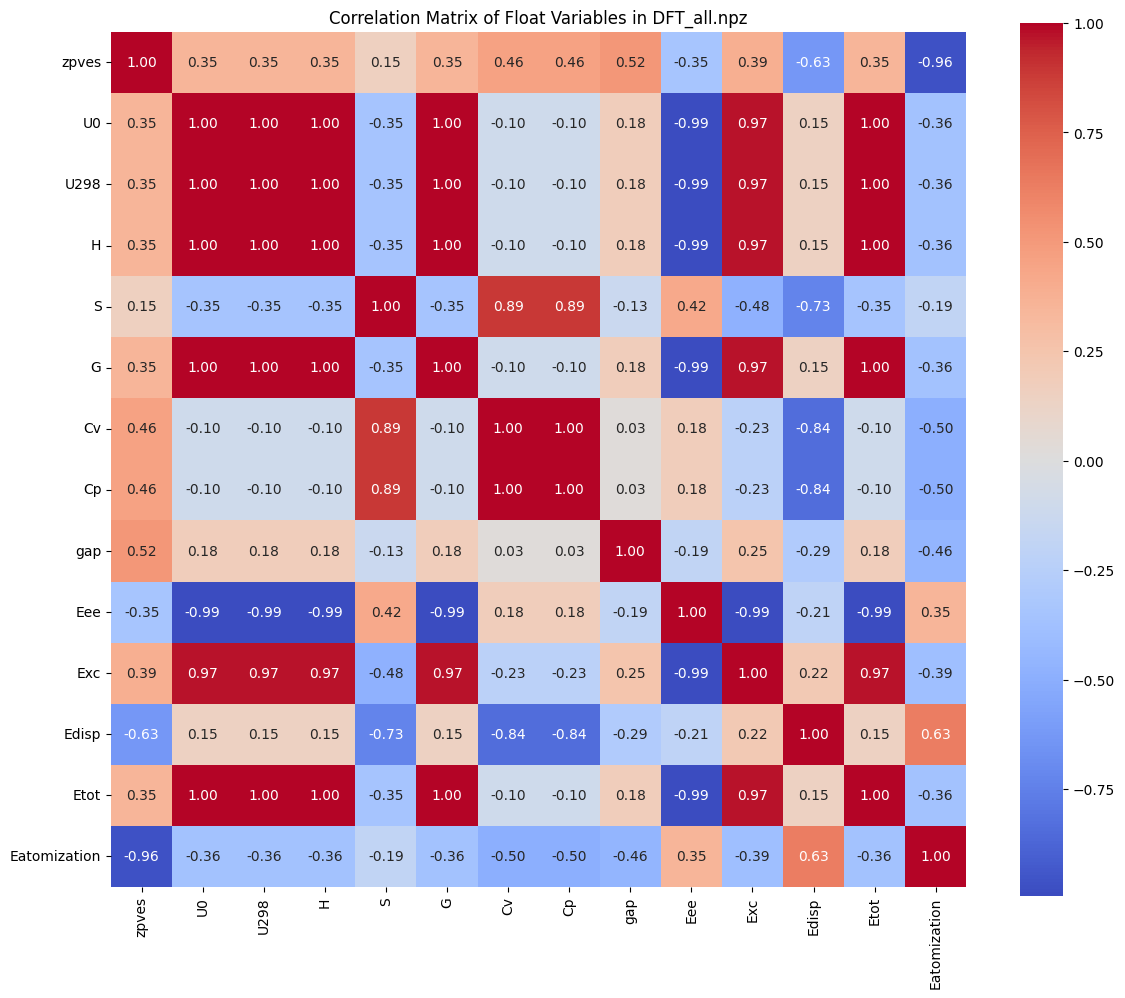

In [7]:
# calculate correlations
corr_matrix = df.corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Float Variables in DFT_all.npz")
plt.tight_layout()
plt.show()

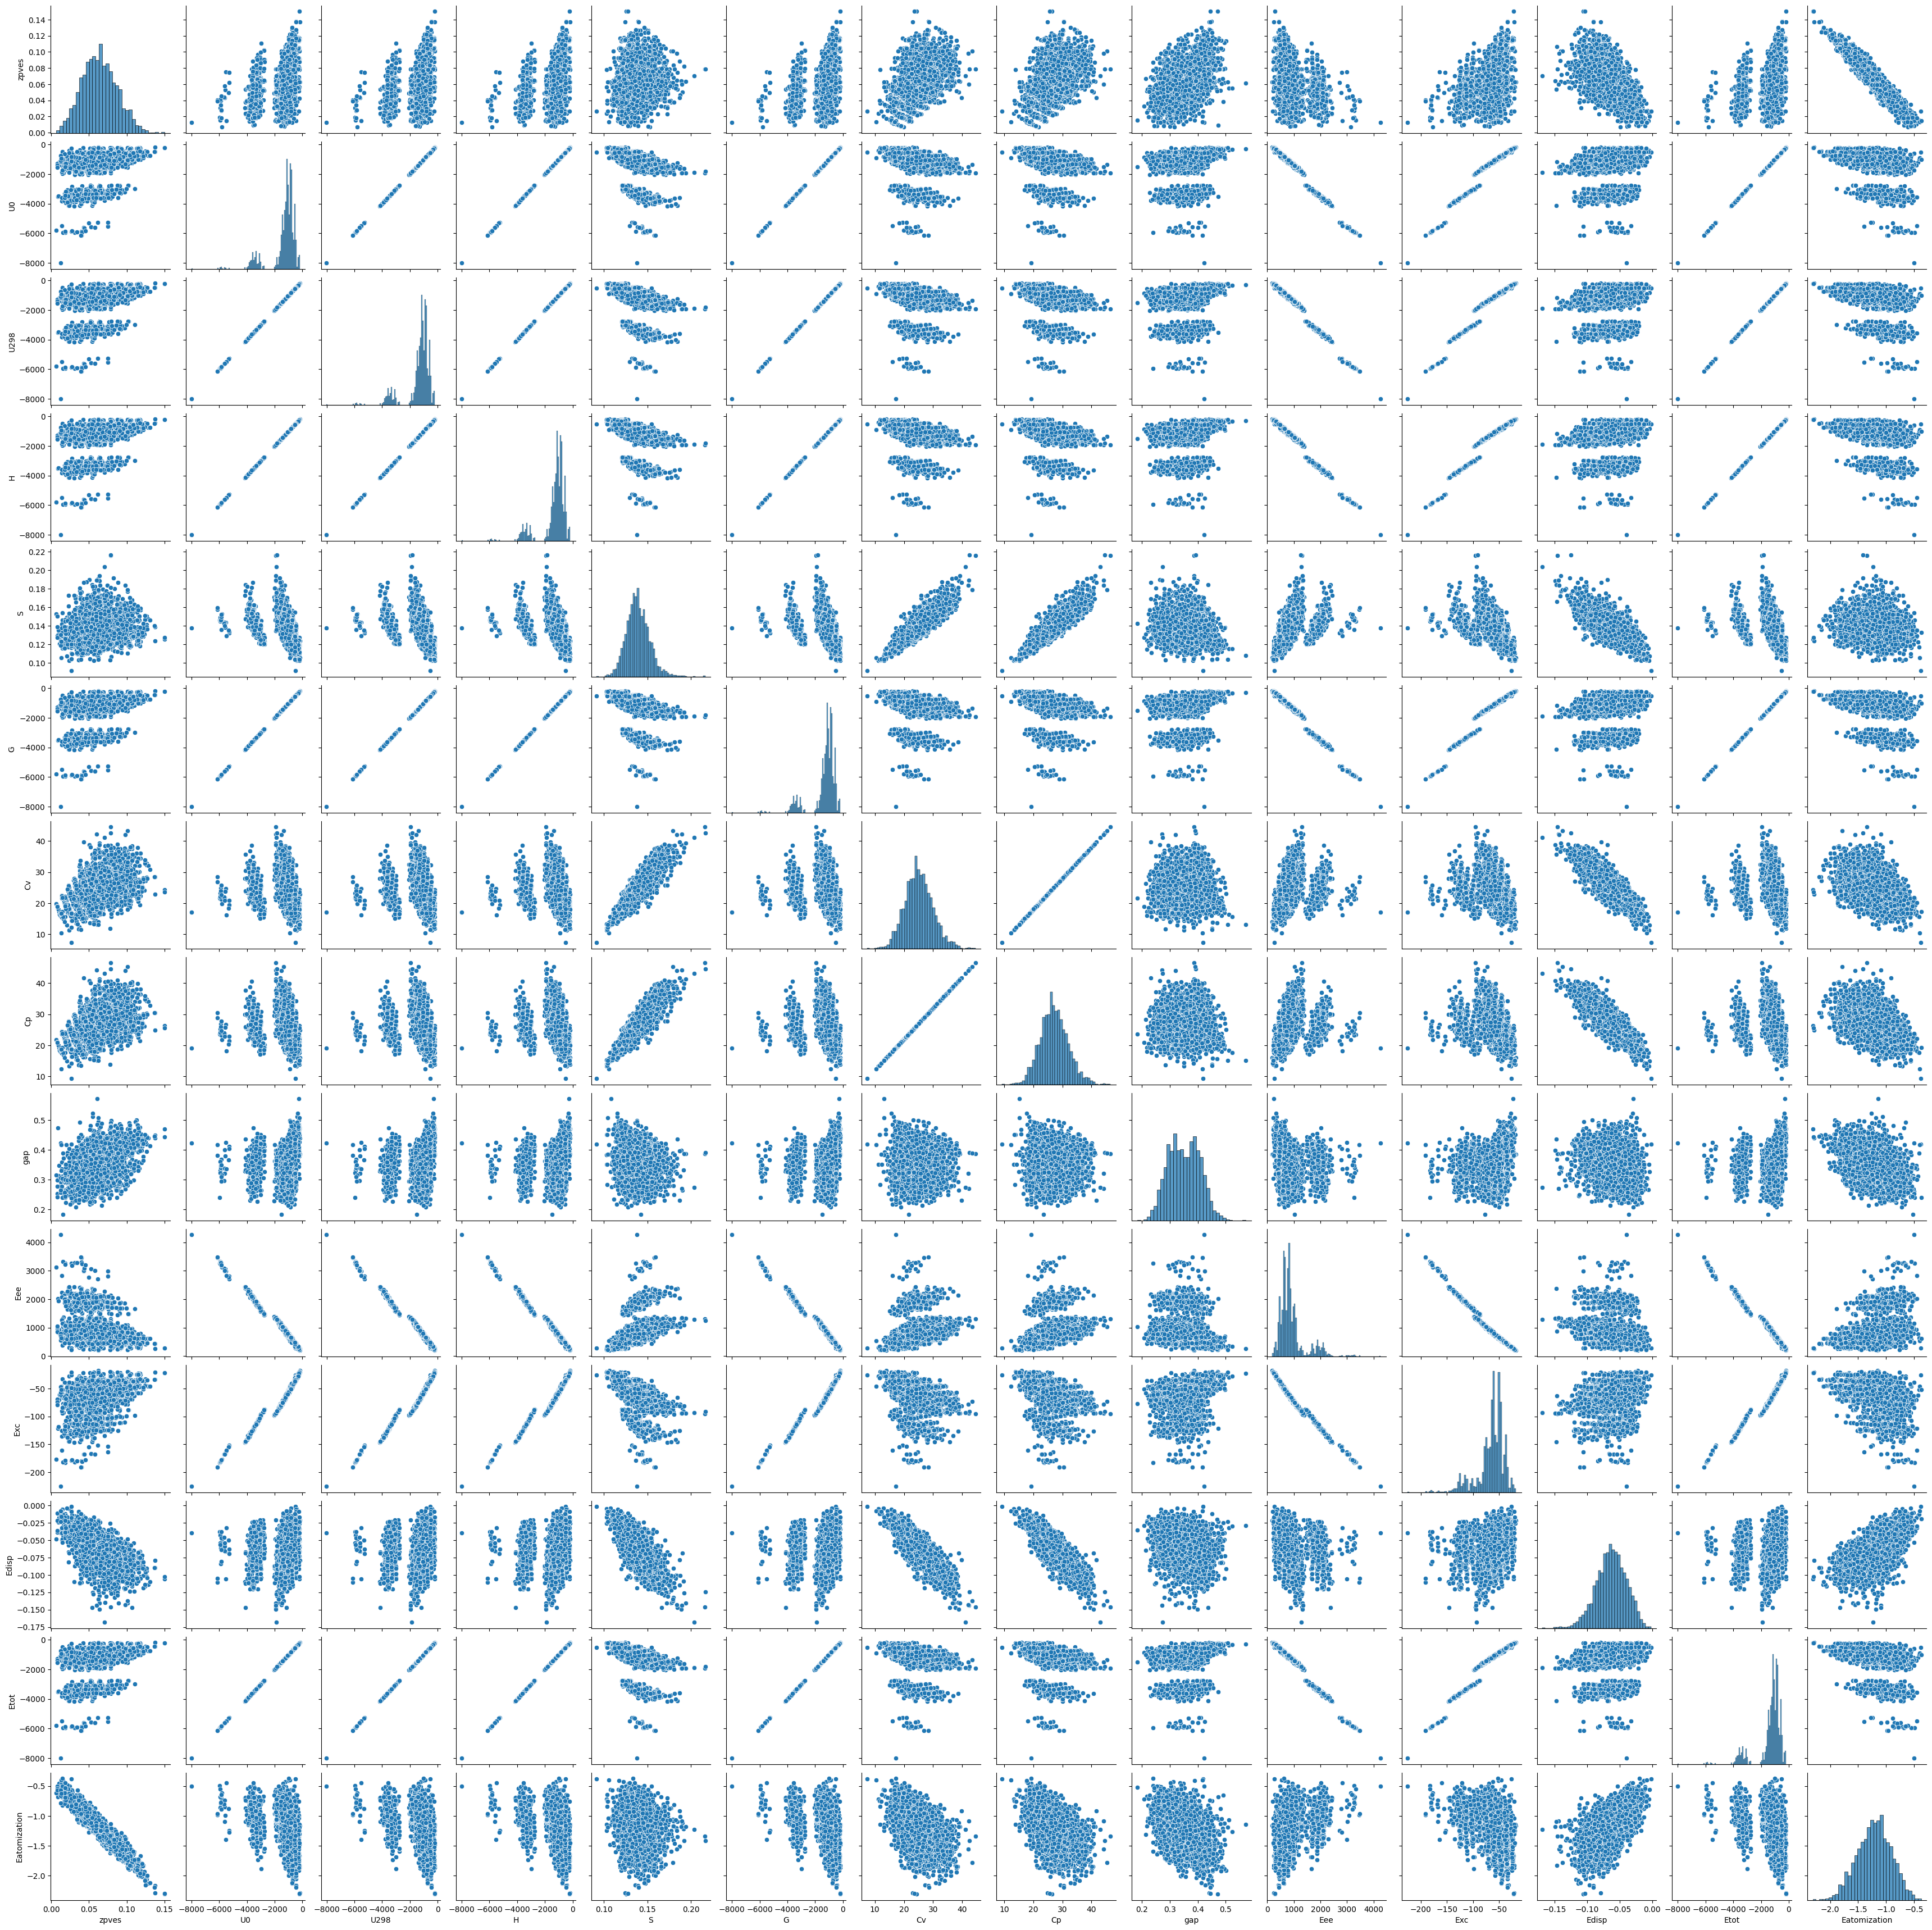

In [8]:
num_cols = df.select_dtypes(include="number").columns

# 3000 samples
sns.pairplot(df[num_cols].sample(3000, random_state=0))
plt.show()